# Popular Data Science Questions

In [29]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [30]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# following
https://nbviewer.jupyter.org/urls/community.dataquest.io/uploads/short-url/6nhhfDlJWDmf7KXGjz9jhjwgldn.ipynb
    
https://nbviewer.jupyter.org/urls/community.dataquest.io/uploads/short-url/alSJdQsJKoGf7Mq1f87Mj8vF62T.ipynb
    
https://nbviewer.jupyter.org/urls/community.dataquest.io/uploads/short-url/28s8YRRZFN0P0XBH0WJ1BEXGqiN.ipynb

# Functions

In [65]:
def highlight_max(data):
    '''
    highlight the first largest value in each row in the DataFrame
    '''
    attr = 'background-color: {}'.format("yellow")
    
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.nlargest(1).values[-1]
        return [attr if v else '' for v in is_max]

In [66]:
def clean_same_tags_relation(data):
    for column in data.columns.tolist():
        data.loc[column, column] = 0
    return data

## Read Data

In [67]:
questions_df = pd.read_csv("2019_questions.csv", date_parser=['CreationDate'])
questions_df.head(5)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [68]:
all_questions_df = pd.read_csv('all_questions.csv',parse_dates=["CreationDate"])
all_questions_df.head(5)

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


## Clean Data

In [6]:
questions_df.describe()

,Id,Score,ViewCount,AnswerCount,FavoriteCount
count,8839.000000,8839.000000,8839.000000,8839.000000,1407.000000
mean,54724.172870,0.870687,171.548026,0.787985,1.184790
std,6507.618509,1.410255,772.813626,0.851146,0.982766
min,43363.000000,-2.000000,2.000000,0.000000,0.000000
25%,48917.500000,0.000000,22.000000,0.000000,1.000000
50%,54833.000000,1.000000,40.000000,1.000000,1.000000
75%,60674.500000,1.000000,98.000000,1.000000,1.000000
max,65675.000000,45.000000,33203.000000,9.000000,16.000000


In [7]:
questions_df.isna().sum()

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    7432
dtype: int64

In [8]:
questions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             8839 non-null   int64  
 1   CreationDate   8839 non-null   object 
 2   Score          8839 non-null   int64  
 3   ViewCount      8839 non-null   int64  
 4   Tags           8839 non-null   object 
 5   AnswerCount    8839 non-null   int64  
 6   FavoriteCount  1407 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


In [9]:
questions_df["FavoriteCount"].value_counts(dropna=False)

NaN     7432
1.0      953
2.0      205
0.0      175
3.0       43
4.0       12
5.0        8
6.0        4
7.0        4
11.0       1
8.0        1
16.0       1
Name: FavoriteCount, dtype: int64

In [10]:
questions_df["Tags"].value_counts(dropna=False)

<machine-learning>                                    118
<python><pandas>                                       58
<python>                                               55
<r>                                                    38
<tensorflow>                                           36
                                                     ... 
<policy-gradients><actor-critic>                        1
<data><feature-engineering><encoding>                   1
<machine-learning><classification><decision-trees>      1
<machine-learning><python><scala>                       1
<python><jupyter><fastai>                               1
Name: Tags, Length: 6462, dtype: int64

From the previous info listed we conclude that **Tags** column should be converted to string and cleaned. **FavoriteCount** column is the unique that contains **NaN** values, in next steps will be filled with 0 value.

In [11]:
questions_df["FavoriteCount"] = questions_df["FavoriteCount"].fillna(0).astype(int)
questions_df["FavoriteCount"].value_counts(dropna=False)

0     7607
1      953
2      205
3       43
4       12
5        8
6        4
7        4
8        1
16       1
11       1
Name: FavoriteCount, dtype: int64

In [12]:
questions_df["Tags"] = questions_df["Tags"].str.replace('><', ',').str.replace('<|>', "").str.split(',')
questions_df["Tags"].head()

<ipython-input-12-caa49a9759a5>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  questions_df["Tags"] = questions_df["Tags"].str.replace('><', ',').str.replace('<|>', "").str.split(',')


0                      [machine-learning, data-mining]
1    [machine-learning, regression, linear-regressi...
2         [python, time-series, forecast, forecasting]
3                [machine-learning, scikit-learn, pca]
4             [dataset, bigdata, data, speech-to-text]
Name: Tags, dtype: object

## Determining most popular tags

To determine the most popular tags we will consider the following:
<ul>
  <li>Find the count of how many times a tag was used.</li>
  <li>How many times a question with that tag was viewed.</li>  
</ul>

### Tags Count

In [13]:
tags_count = {}
for tags_list in questions_df["Tags"]:
    for tag in tags_list:
        if tag in tags_count:
            tags_count[tag] += 1
        else:
            tags_count[tag] = 1
tags_count

{'machine-learning': 2693,
 'data-mining': 217,
 'regression': 347,
 'linear-regression': 175,
 'regularization': 50,
 'python': 1814,
 'time-series': 466,
 'forecast': 34,
 'forecasting': 85,
 'scikit-learn': 540,
 'pca': 85,
 'dataset': 340,
 'bigdata': 95,
 'data': 213,
 'speech-to-text': 8,
 'fuzzy-logic': 13,
 'anomaly-detection': 92,
 'online-learning': 13,
 'matrix-factorisation': 24,
 'correlation': 80,
 'naive-bayes-classifier': 42,
 'deep-learning': 1220,
 'keras': 935,
 'cnn': 489,
 'theory': 11,
 'gradient-descent': 98,
 'nlp': 493,
 'clustering': 257,
 'feature-extraction': 87,
 'encoding': 54,
 'embeddings': 44,
 'pandas': 354,
 'numpy': 117,
 'decision-trees': 145,
 'accuracy': 89,
 'matlab': 62,
 'reinforcement-learning': 203,
 'q-learning': 37,
 'policy-gradients': 27,
 'neural-network': 1055,
 'image-classification': 211,
 'r': 268,
 'logistic-regression': 154,
 'predictive-modeling': 265,
 'lstm': 402,
 'tensorflow': 584,
 'gpu': 42,
 'data-cleaning': 157,
 'object-d

In [14]:
questions_df

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,0
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,0
...,...,...,...,...,...,...,...
8834,55413,2019-07-10 09:08:31,1,39,"[pca, dimensionality-reduction, linear-algebra]",1,1
8835,55414,2019-07-10 09:34:55,0,113,"[keras, weight-initialization]",0,0
8836,55415,2019-07-10 09:45:37,1,212,"[python, visualization, seaborn]",1,0
8837,55416,2019-07-10 09:59:56,0,22,[time-series],0,0


In [15]:
tags_views = {}
tags_score = {}
tags_answer_count = {}
tags_favorite_count = {}

for index, tags in enumerate(questions_df['Tags']):
    for tag in tags:
        if tag in tags_views:
            tags_views[tag] += questions_df["ViewCount"].iloc[index]
            tags_score[tag] += questions_df["Score"].iloc[index]
            tags_answer_count[tag] += questions_df["AnswerCount"].iloc[index]
            tags_favorite_count[tag] += questions_df["FavoriteCount"].iloc[index]
        else:
            tags_views[tag] = questions_df["ViewCount"].iloc[index]
            tags_score[tag] = questions_df["Score"].iloc[index]
            tags_answer_count[tag] = questions_df["AnswerCount"].iloc[index]
            tags_favorite_count[tag] = questions_df["FavoriteCount"].iloc[index]

tags_values_counts =  {} #tag-counts, tags-views, tag-score, tag-answe-count, tag-fav-count, tag-final-score
for tag in tags_count.keys():
    tags_values_counts[tag] = [tags_count[tag], 
                               tags_views[tag],
                               tags_score[tag],
                               tags_answer_count[tag],
                               tags_favorite_count[tag],                               
                               tags_count[tag] + tags_views[tag] + tags_score[tag] + tags_answer_count[tag] + tags_favorite_count[tag]
                              ]   

In [16]:
tags_counts_df = pd.DataFrame(columns=['tag', 'TagCount', 'TagViews', 'TagScore', 'TagAnswerCount', 'TagFavCount', 'TagTotalScore']) 
for tag in list(tags_values_counts.keys()):
    tags_counts_df = tags_counts_df.append({
        'tag': tag,
        'TagCount':tags_values_counts[tag][0], 
        'TagViews':tags_values_counts[tag][1], 
        'TagScore':tags_values_counts[tag][2], 
        'TagAnswerCount':tags_values_counts[tag][3], 
        'TagFavCount':tags_values_counts[tag][4], 
        'TagTotalScore':tags_values_counts[tag][5]         
    }, ignore_index=True)
tags_counts_df

,tag,TagCount,TagViews,TagScore,TagAnswerCount,TagFavCount,TagTotalScore
0,machine-learning,2693,388499,2515,2313,575,396595
1,data-mining,217,31056,186,183,31,31673
2,regression,347,49451,277,309,47,50431
3,linear-regression,175,18978,160,202,38,19553
4,regularization,50,4941,52,39,5,5087
...,...,...,...,...,...,...,...
521,encoder,1,16,1,1,0,19
522,label-smoothing,1,480,0,1,1,483
523,label-flipping,1,480,0,1,1,483
524,3d-object-detection,1,7,0,0,0,8


In [17]:
columns = ["TagCount", "TagViews", "TagScore", "TagAnswerCount", "TagFavCount", "TagTotalScore"]
tags_counts_df[columns] = tags_counts_df[columns].apply(pd.to_numeric)     

In [18]:
tags_counts_df.columns.tolist()

['tag',
 'TagCount',
 'TagViews',
 'TagScore',
 'TagAnswerCount',
 'TagFavCount',
 'TagTotalScore']

In [19]:
def edit_plot(axes):
    titles = ["Most Used", "Most Viewed", "Most Answered", "Biggest Score", "Most Favs", "Biggest Total Score"]
    t_index = 0
    for sublist in axes:       
        for ax in sublist:
            #ax.set_xlabel("",fontsize=12)
            #ax.set_ylabel("",fontsize=12)
            ax.set_title(titles[t_index], fontweight='bold')
            ax.set_ylabel("")
            ax.tick_params(bottom=True, top=False, left=False, right=False, labelbottom=True)
            ax.get_legend().remove()
            t_index += 1
    return axes

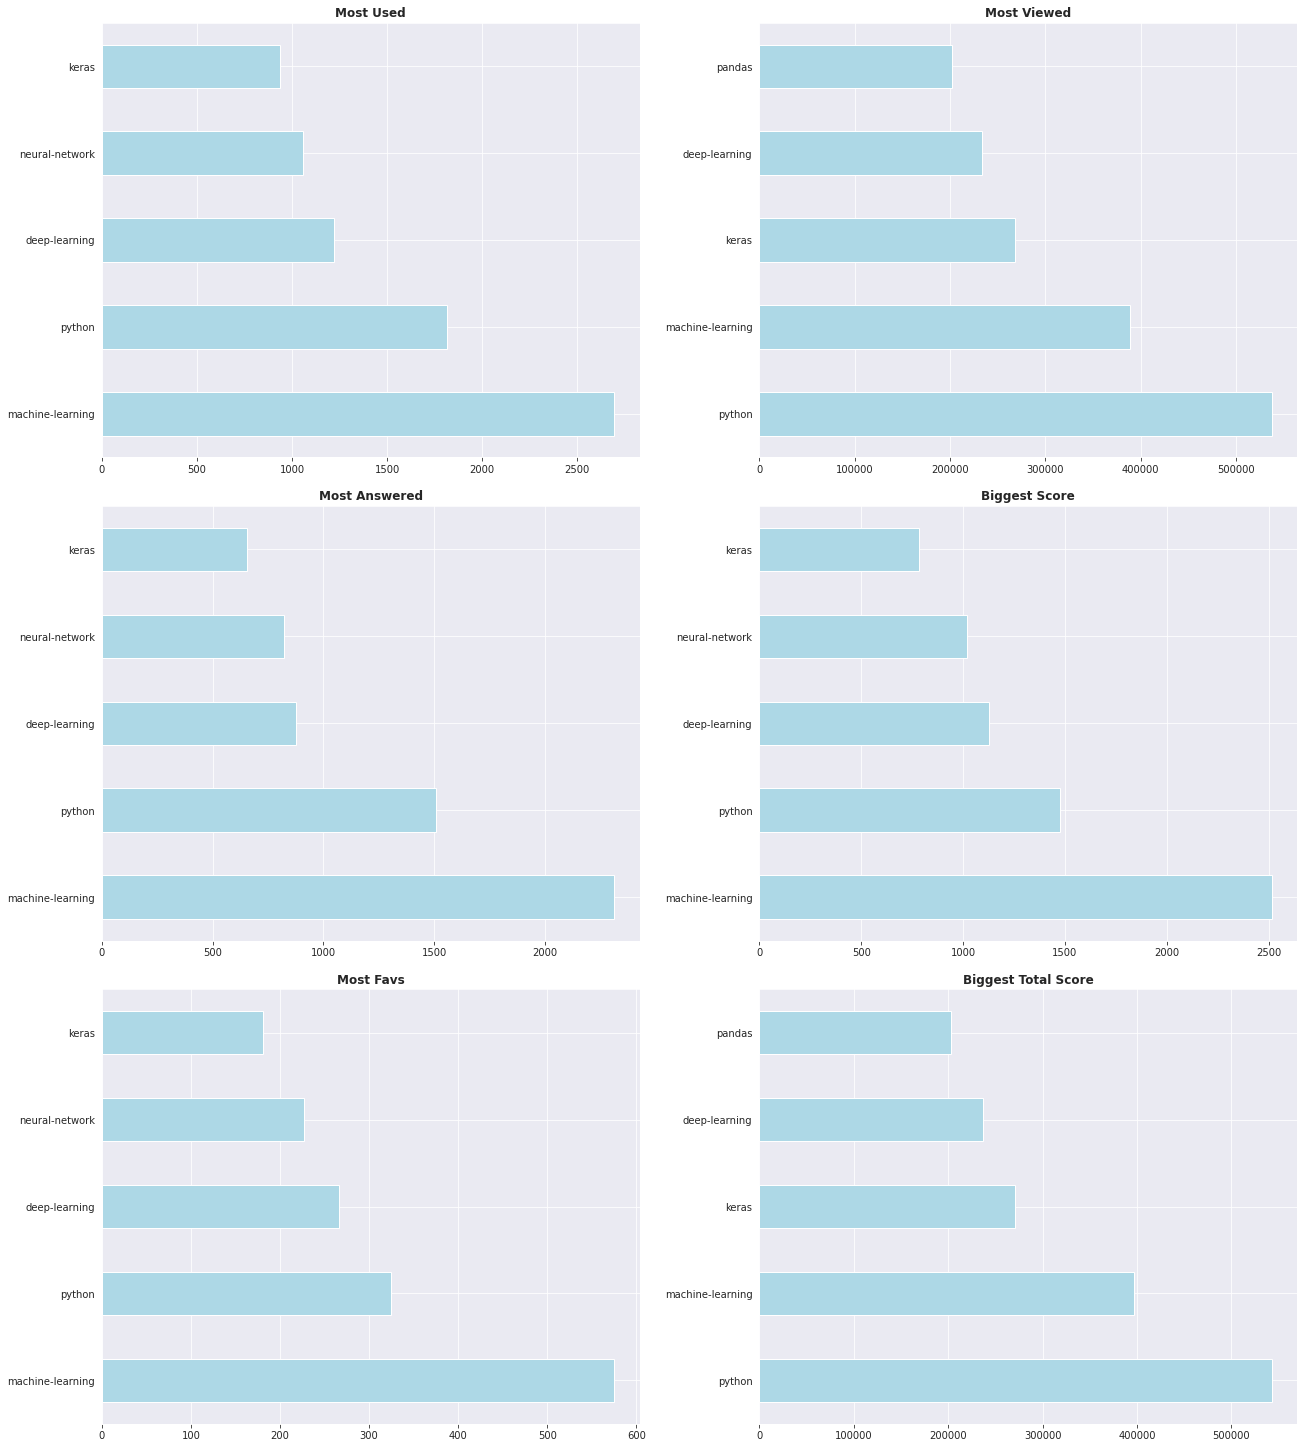

In [20]:
sns.set_style("darkgrid")
barcolor="lightblue"
fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(18,20), constrained_layout=True)
tags_counts_df[["tag", "TagCount"]].sort_values(by="TagCount", ascending=False).head(5).plot.barh(x="tag", y='TagCount', ax=axes[0][0], color=barcolor)
tags_counts_df[["tag", "TagViews"]].sort_values(by="TagViews", ascending=False).head(5).plot.barh(x="tag", y='TagViews', ax=axes[0][1], color=barcolor)
tags_counts_df[["tag", "TagAnswerCount"]].sort_values(by="TagAnswerCount", ascending=False).head(5).plot.barh(x="tag", y='TagAnswerCount', ax=axes[1][0], color=barcolor)
tags_counts_df[["tag", "TagScore"]].sort_values(by="TagScore", ascending=False).head(5).plot.barh(x="tag", y='TagScore', ax=axes[1][1], color=barcolor)
tags_counts_df[["tag", "TagFavCount"]].sort_values(by="TagFavCount", ascending=False).head(5).plot.barh(x="tag", y='TagFavCount', ax=axes[2][0], color=barcolor)
tags_counts_df[["tag", "TagTotalScore"]].sort_values(by="TagTotalScore", ascending=False).head(5).plot.barh(x="tag", y='TagTotalScore', ax=axes[2][1], color=barcolor)
axes = edit_plot(axes)

As we can see from the previous charts:
<ul>
    <li><b>Most Used</b></li>
    <li><b>Most Viewed</b></li>
    <li><b>Most Answered</b></li>
    <li><b>Biggest Score</b></li>
    <li><b>Most Favs</b></li>
</ul>

The that **Machine-Learning** is the first in **4/5**. The diffrence is that the **python** tag is remarkably the **Most Viewed** tag by far. That's why in the final column **TagTotalScore** which was created using the values of the other columns and showed in the **Biggest Total Score** subplot, the **python** tag is the first one and **machine-learning** the second.

# Tags Relations

### Tags Used and Tags Viewed

In [21]:
tags_counts_df.isna().sum()

tag               0
TagCount          0
TagViews          0
TagScore          0
TagAnswerCount    0
TagFavCount       0
TagTotalScore     0
dtype: int64

In [22]:
tagCount = tags_counts_df[["tag", "TagCount"]].sort_values(by="TagCount", ascending=False).head(20)
tagViews = tags_counts_df[["tag", "TagViews"]].sort_values(by="TagViews", ascending=False).head(20)
# Left join
tags_used_relation = pd.merge(tagCount, tagViews, how="left", left_on="tag", right_on="tag")
# Right join
tags_viewed_relation = pd.merge(tagCount, tagViews, how="right", left_on="tag", right_on="tag")
# Find missing tags
tags_related = pd.concat([tags_used_relation, tags_viewed_relation]).drop_duplicates()
tags_related

,tag,TagCount,TagViews
0,machine-learning,2693.0,388499.0
1,python,1814.0,537585.0
2,deep-learning,1220.0,233628.0
3,neural-network,1055.0,185367.0
4,keras,935.0,268608.0
5,classification,685.0,104457.0
6,tensorflow,584.0,121369.0
7,scikit-learn,540.0,128110.0
8,nlp,493.0,71382.0
9,cnn,489.0,70349.0


From the previous **Top 20** list combining the **Most Used** and **Most Viewed** tags we can conclude with:

**Most used tags not present in most viewed list:**
<ul>
    <li>r</li>
    <li>predictive-modeling</li>
    <li>statistics</li>
    <li>machine-learning-model</li>
</ul>

**Most viewed tags not present in most used list:**
<ul>
    <li>dataframe</li>
    <li>numpy</li>
    <li>pytorch</li>
    <li>csv</li>
</ul>

### Tags relations

In [23]:
tags_count_heatmap = pd.DataFrame(index=tags_counts_df["tag"], columns=tags_counts_df["tag"])
tags_count_heatmap.fillna(0,inplace=True)
tags_count_heatmap

tag,machine-learning,data-mining,regression,linear-regression,regularization,python,time-series,forecast,forecasting,scikit-learn,...,haar-cascade,gru,pattern-recognition,text-classification,parquet,encoder,label-smoothing,label-flipping,3d-object-detection,kitti-dataset
tag,,,,,,,,,,,,,,,,,,,,,
machine-learning,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
data-mining,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
regression,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
linear-regression,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
regularization,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
encoder,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
label-smoothing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
label-flipping,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
for tag_list in questions_df["Tags"]:
    for i in range(0, len(tag_list)):
        for j in range(1, len(tag_list)):
            tags_count_heatmap.loc[tag_list[i],tag_list[j]] +=1
tags_count_heatmap    

tag,machine-learning,data-mining,regression,linear-regression,regularization,python,time-series,forecast,forecasting,scikit-learn,...,haar-cascade,gru,pattern-recognition,text-classification,parquet,encoder,label-smoothing,label-flipping,3d-object-detection,kitti-dataset
tag,,,,,,,,,,,,,,,,,,,,,
machine-learning,1,95,119,68,20,499,131,9,29,188,...,0,0,1,0,0,0,0,0,0,0
data-mining,0,143,3,1,0,6,9,0,0,2,...,0,0,0,0,0,0,0,0,0,0
regression,0,3,243,35,2,18,18,1,6,27,...,0,0,0,0,0,0,0,0,0,0
linear-regression,0,1,20,134,1,12,5,1,2,20,...,0,0,0,0,0,0,0,0,0,0
regularization,0,0,2,1,48,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
encoder,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
label-smoothing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
label-flipping,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
most_used_tags = tags_count_heatmap.loc[tags_counts_df[["tag", "TagCount"]].sort_values(by="TagCount", ascending=False).head(20)["tag"],
                                       tags_counts_df[["tag", "TagCount"]].sort_values(by="TagCount", ascending=False).head(20)["tag"]]
most_used_tags = clean_same_tags_relation(most_used_tags)
most_used_tags.style.apply(highlight_max,axis=1)

tag,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset,r,predictive-modeling,clustering,statistics,machine-learning-model
tag,,,,,,,,,,,,,,,,,,,,
machine-learning,0,499,429,366,195,259,106,188,113,124,131,71,62,119,99,63,123,61,89,139
python,0,0,159,137,280,98,167,235,71,62,105,61,244,59,53,24,35,45,35,37
deep-learning,0,51,0,144,247,59,136,16,72,160,44,103,1,21,32,5,32,2,12,19
neural-network,0,33,305,0,235,65,108,24,24,118,33,69,1,42,20,9,13,8,11,10
keras,0,62,149,105,0,43,255,34,23,116,51,133,3,31,13,10,11,0,3,17
classification,0,36,33,32,58,0,20,47,35,20,25,20,3,34,28,10,27,12,19,21
tensorflow,0,26,73,41,179,12,0,11,11,57,9,43,3,9,9,1,6,0,0,9
scikit-learn,0,93,12,13,25,29,15,0,12,0,12,2,37,37,9,1,12,24,6,18
nlp,0,17,33,8,11,19,7,8,0,7,0,19,3,2,11,1,1,9,3,4


In [26]:
most_viewed_tags  = tags_count_heatmap.loc[tags_counts_df[["tag", "TagViews"]].sort_values(by="TagViews", ascending=False).head(20)["tag"],
tags_counts_df[["tag", "TagViews"]].sort_values(by="TagViews", ascending=False).head(20)["tag"]]
most_viewed_tags = clean_same_tags_relation(most_viewed_tags)
most_viewed_tags.style.apply(highlight_max,axis=1)

tag,python,machine-learning,keras,deep-learning,pandas,neural-network,scikit-learn,tensorflow,classification,dataframe,lstm,nlp,cnn,time-series,numpy,regression,dataset,pytorch,csv,clustering
tag,,,,,,,,,,,,,,,,,,,,
python,0,0,280,159,244,137,235,167,98,51,61,71,62,105,71,59,53,41,17,45
machine-learning,499,0,195,429,62,366,188,106,259,6,71,113,124,131,24,119,99,25,3,61
keras,62,0,0,149,3,105,34,255,43,0,133,23,116,51,11,31,13,12,2,0
deep-learning,51,0,247,0,1,144,16,136,59,0,103,72,160,44,10,21,32,41,1,2
pandas,43,0,2,1,0,1,28,3,1,60,7,2,1,13,35,5,10,0,11,4
neural-network,33,0,235,305,1,0,24,108,65,0,69,24,118,33,11,42,20,26,0,8
scikit-learn,93,0,25,12,37,13,0,15,29,2,2,12,0,12,12,37,9,2,0,24
tensorflow,26,0,179,73,3,41,11,0,12,0,43,11,57,9,13,9,9,18,0,0
classification,36,0,58,33,3,32,47,20,0,1,20,35,20,25,4,34,28,2,1,12


From the previous tables the same pairs values where removed. After, as we can see in the tables above, the most used pair of tags is **python and machine-learning**. Also there is a list of most used pairs:
<ul>
    <li><b>python</b> </li>
    <ul>
        <li>scikit-learn</li>
        <li>pandas</li>
        <li>machine-learning-model</li>
        <li>keras</li>
    </ul>    
     <li><b>deep-learning</b></li>
    <ul>
        <li>keras</li>
        <li>neural-network</li>
        <li>cnn</li>
        <li>nlp</li>
        <li>predictive modelling</li>
        <li>pytorch</li>
    </ul>        
    <li><b>keras</b> </li>
    <ul>
        <li>tensorflow</li>
        <li>classification</li>
        <li>lstm</li>        
    </ul>   
</ul>

Fom the domain knowledge we can conlude that these relations are correct, a short explanation of this tags is at follows:
<ul>
    <li><b>Python</b> is a programming language.</li>
    <li><b>Scikit-learn, tensorflow, keras, pandas</b> are libraries written in <b>python</b>.</li>
    <li><b>Machine-learning</b> is a branch of Artificial Inteligence, the use and development of computer systems that are able to learn and adapt without following explicit instructions, by using algorithms and statistical models to analyse and draw inferences from patterns in data. <b>Scikit-learn</b> is an efficient tool to implement ml algorithms</li>
    <li><b>Deep-learning</b> is a field of <b>machine-learning</b> based on <b>neural networks</b>. <b>Tensroflow</b> is an open source library for deep learning for large systems, <b>keras</b> is a modular neural network based on tensorflow. <b>Pytorch</b> is also a deep learning library whose bases differ from tensorflow.</li>
</ul>

From the previous observations the question that comes to our mind is: <b>Is deep learning just a fad?</b>.

### Deep learning tags analysis

In this part we will track the interest in deep learning across time. To do it we will:
    <ul>
    <li>Count how many deep learning questions are asked per time period.</li>
    <li>The total amount of questions per time period.</li>
    <li>How many deep learning questions there are relative to the total amount of questions per time period.</li>
    </ul>

In [69]:
all_questions_df

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...
...,...,...,...
21571,36971,2018-08-15 14:19:01,<statistics><data>
21572,36974,2018-08-15 14:40:27,<machine-learning><neural-network><classifier>
21573,36975,2018-08-15 14:53:43,<machine-learning><classification>
21574,36979,2018-08-14 19:31:43,<tensorflow><python>


In [70]:
all_questions_df["Tags"] = all_questions_df["Tags"].str.replace('><', ',').str.replace('<|>', "").str.split(',')
all_questions_df["Tags"].head()

0        [python, keras, tensorflow, cnn, probability]
1                                     [neural-network]
2                        [python, ibm-watson, chatbot]
3                                              [keras]
4    [r, predictive-modeling, machine-learning-mode...
Name: Tags, dtype: object

To count how many deep learning questions are asked per time period. First let's define the tags related to **deep learning**, to do it from the **Tags** column we will find all entries that contains the **deep-learning** tags,  keeping all the tags at in the same list considering them as **tags directly related to deep-learning**.

In [71]:
dl_tags = all_questions_df[pd.DataFrame(all_questions_df["Tags"].tolist()).isin(["deep-learning"])
                           .any(1).values]["Tags"]
len(dl_tags)

2805

In [72]:
len(all_questions_df["Tags"])

21576

In [73]:
dl_tags

14          [python, neural-network, deep-learning, keras]
28                       [machine-learning, deep-learning]
29       [machine-learning, deep-learning, keras, sciki...
55       [machine-learning, neural-network, deep-learni...
63                                         [deep-learning]
                               ...                        
21555            [machine-learning, python, deep-learning]
21557             [python, deep-learning, tensorflow, cnn]
21558                        [deep-learning, nlp, dataset]
21564               [deep-learning, classification, mnist]
21575                  [python, deep-learning, tensorflow]
Name: Tags, Length: 2805, dtype: object

In [74]:
all_questions_df["DeepLearningTag"] = "No"
all_questions_df.loc[all_questions_df.index.isin(dl_tags.index.tolist()), "DeepLearningTag"] = "Yes"

In [75]:
all_questions_df["DeepLearningTag"].value_counts()

No     18771
Yes     2805
Name: DeepLearningTag, dtype: int64

From the total of **21576** tags we see that **2805** are tags considered directly related to deep-learning.

To determine the total amount of questions per time period and how many deep learning questions there are relative to the total amount of questions per time period we will use the **CreationDate** column.

In [76]:
questions_per_year = all_questions_df.groupby(by=all_questions_df['CreationDate'].dt.year)["Id"].count()
questions_per_year

CreationDate
2014     562
2015    1167
2016    2146
2017    2957
2018    5475
2019    8810
2020     459
Name: Id, dtype: int64

In [77]:
dl_questions_per_year = all_questions_df[all_questions_df["DeepLearningTag"] == "Yes"].groupby(by=all_questions_df['CreationDate'].dt.year)["Id"].count()
dl_questions_per_year

CreationDate
2014       8
2015      30
2016     157
2017     425
2018     902
2019    1216
2020      67
Name: Id, dtype: int64

In the previous lists we can se a comparation of the total questions with the deep learning related questions. We can see that there are considerably less questions in the years 2014 and 2020. Let's determine if the dataframe contains data from all the 12 months.

In [78]:
all_questions_df[all_questions_df["CreationDate"].dt.year == 2014]["CreationDate"].dt.month.unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12])

In [79]:
all_questions_df[all_questions_df["CreationDate"].dt.year == 2020]["CreationDate"].dt.month.unique()

array([1])

As we can se the dataset contains data only from the **fifth month** of 2014 and only the correspondent data to the **first** month of 2020. Because the dataset contains the complete data only for 5 years instead of creating proxies for this missing 2 years, we will drop the data related.

In [80]:
all_questions_df = all_questions_df[
    (all_questions_df["CreationDate"].dt.year != 2014) &
    (all_questions_df["CreationDate"].dt.year != 2020)]
all_questions_df

,Id,CreationDate,Tags,DeepLearningTag
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",No
1,45418,2019-02-12 00:50:39,[neural-network],No
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",No
3,45426,2019-02-12 04:51:49,[keras],No
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",No
...,...,...,...,...
21571,36971,2018-08-15 14:19:01,"[statistics, data]",No
21572,36974,2018-08-15 14:40:27,"[machine-learning, neural-network, classifier]",No
21573,36975,2018-08-15 14:53:43,"[machine-learning, classification]",No
21574,36979,2018-08-14 19:31:43,"[tensorflow, python]",No


In [81]:
questions_per_year = all_questions_df.groupby(by=all_questions_df['CreationDate'].dt.year)["Id"].count()
dl_questions_per_year = all_questions_df[all_questions_df["DeepLearningTag"] == "Yes"].groupby(by=all_questions_df['CreationDate'].dt.year)["Id"].count()
dl_questions_per_year

CreationDate
2015      30
2016     157
2017     425
2018     902
2019    1216
Name: Id, dtype: int64

In [82]:
questions_per_year

CreationDate
2015    1167
2016    2146
2017    2957
2018    5475
2019    8810
Name: Id, dtype: int64

In [84]:
questions = pd.DataFrame({"TotalQuestions":questions_per_year, "DeepLearningQuestions":dl_questions_per_year})
questions["DeepLearningRate"] = round(questions["DeepLearningQuestions"] / questions["TotalQuestions"] * 100, 2)
questions

,TotalQuestions,DeepLearningQuestions,DeepLearningRate
CreationDate,,,
2015,1167,30,2.57
2016,2146,157,7.32
2017,2957,425,14.37
2018,5475,902,16.47
2019,8810,1216,13.80


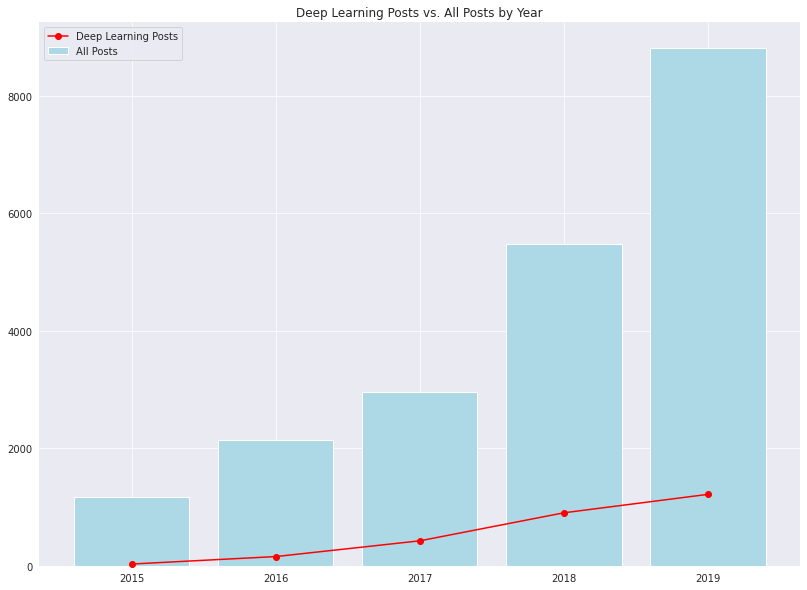

In [90]:
fig = plt.figure(figsize=(30,10)) 
ax = fig.add_subplot(1,2,1)
ax.plot(questions.index,'DeepLearningQuestions',data=questions,clip_on = False, color='red', marker='o',label='Deep Learning Posts')
ax.bar(questions.index,'TotalQuestions',data=questions,clip_on = False, color='lightblue',label='All Posts')
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)
plt.xticks(questions.index)
ax.set_xticklabels(questions.index)
ax.set_title('Deep Learning Posts vs. All Posts by Year')
ax.legend(loc='best')
plt.tick_params(left=False,right=False, top=False,bottom=False)
plt.show()

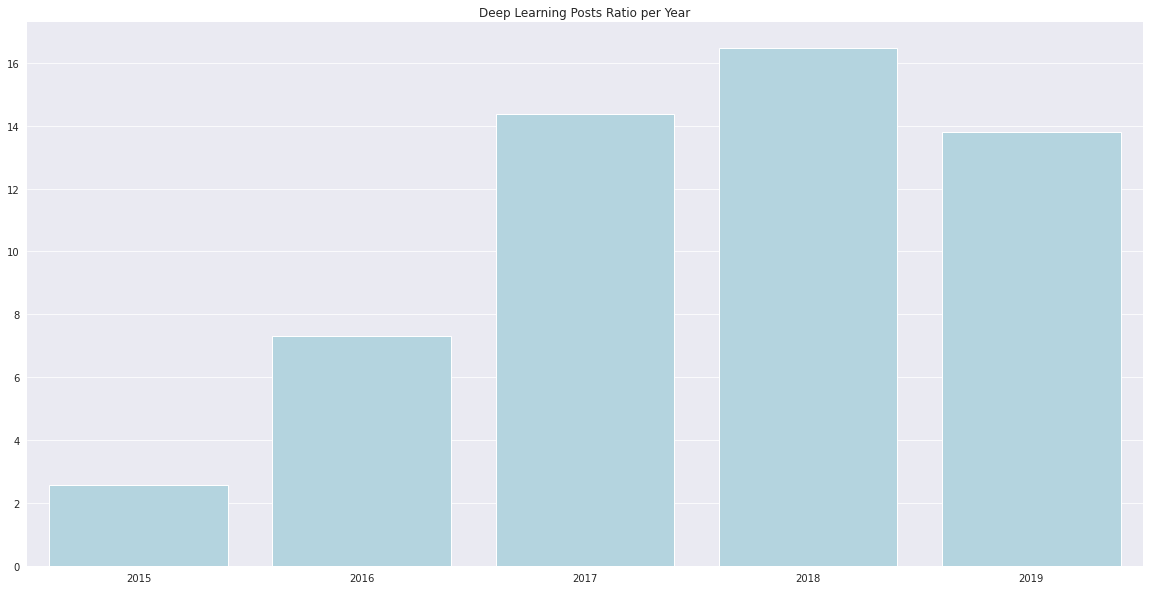

In [105]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x=questions.index, y=questions["DeepLearningRate"], color="lightblue")
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)
ax.set(xlabel=None, ylabel=None)
ax.set_title('Deep Learning Posts Ratio per Year')
plt.tick_params(left=False,right=False, top=False,bottom=False)
plt.show()

We can obeserve from the above chart that the questions asked by the DSSE members related to Deep Learning has increased across the span of time from **2015 to 2019**. And clearly, deep learning is becoming popular as time passes.